# Thème : DETECTION DE FRAUDE 
## Cas des cartes de credit frauduleuses

# Importation des bibliothèques 

In [24]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import joblib as jb

In [25]:
data_credit_card = pd.read_csv('card_transdata.csv')
data_credit_card.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [26]:
data_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [27]:
data_credit_card.shape

(1000000, 8)

# Graphe du nombre de cas frauduleux et non frauduleux

/home/dumping/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dumping/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dumping/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fraud', ylabel='count'>

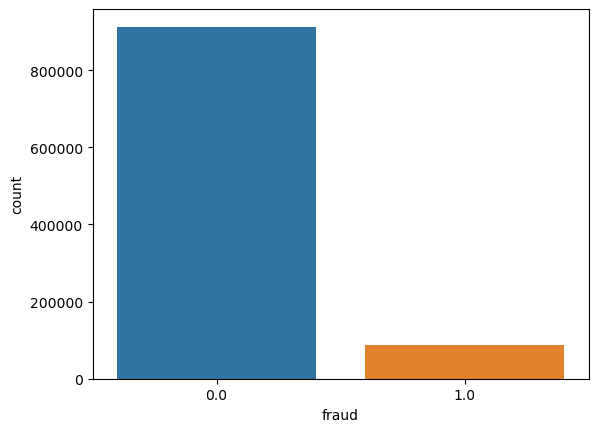

In [29]:
sbn.countplot(x='fraud', data=data_credit_card)

# Division des données en Train et Test

In [30]:
X = data_credit_card.drop(columns="fraud", axis=1)
y = data_credit_card["fraud"]

from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.to_csv('transaction_de_test.csv', index=False)

# Creation du modèle de Regression Logistique pour la classification

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg') 

#    LogisticRegression(solver = 'newton-cg') crée un 
#   modèle de régression logistique qui sera
#   entraîné en utilisant l'algorithme Newton-Conjugate Gradient 
#    pour optimiser les paramètres du modèle

# Entrainement du modèle a l'aide des Train

In [33]:
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [34]:
print("coef : ", model.coef_)
print("intercept : ", model.intercept_)

coef :  [[  0.01510638   0.02541682   0.85876668  -0.61320129  -1.03942681
  -13.21351707   6.63626458]]
intercept :  [-10.34287333]


## Sauvegarde du modèle 

In [35]:
import joblib

# Enregistrement du modèle
joblib.dump(model, 'model_save.pkl')

['model_save.pkl']

# Evaluation 

### --> Precision des tests

In [43]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)  * 100

print("Precision des tests : ", acc_score)
X_test.shape

Precision des tests :  95.86449999999999


(200000, 7)

### --> Matrice de confusion 

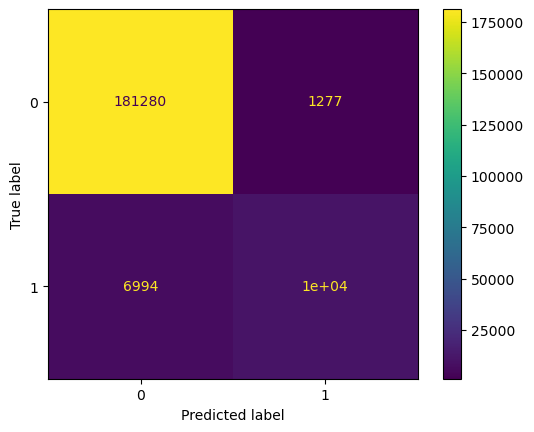

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)
mDisplay = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix)

mDisplay.plot()
plt.show()


### --> Rapport de classification

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

         0.0   0.962852  0.993005  0.977696    182557
         1.0   0.891097  0.599037  0.716446     17443

    accuracy                       0.958645    200000
   macro avg   0.926974  0.796021  0.847071    200000
weighted avg   0.956594  0.958645  0.954911    200000



#########################################################

# Courbe ROC (Receiver Operating Characteristic) 

### Elle représente la performance du modèle en comparant son taux de vrais positifs à son taux de faux positifs pour différents seuils de classification.

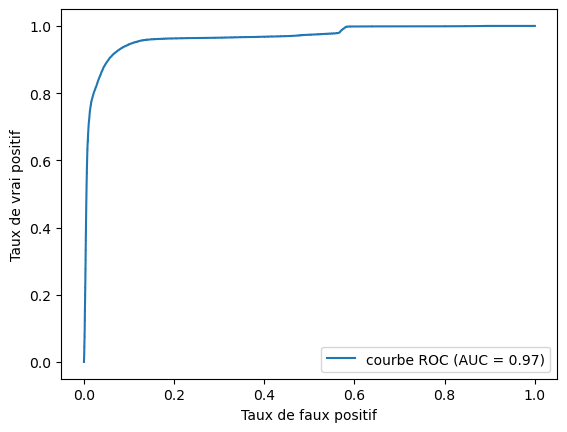

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, seuil = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

# AUC c'est la capacité du modèle a distinguer les frauduleux( ou positif) 
# des non frauduleux (négatif)

plt.plot(fpr, tpr, label="courbe ROC (AUC = %0.2f)" % auc_score)
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrai positif")
plt.legend()
plt.show()

# Courbe de précision-rappel 

### Elle montre la relation entre la précision et le rappel pour différents seuils de classification

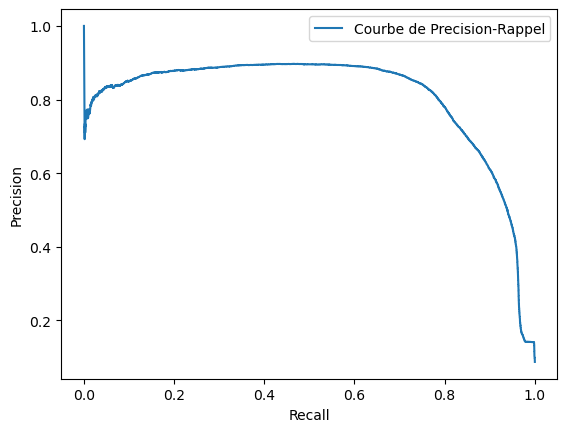

In [41]:
from sklearn.metrics import precision_recall_curve

#Obtenir les scores de précision et de rappel 
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])


plt.plot(recall, precision, label="Courbe de Precision-Rappel")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()